# Name: Ahmad Ossama Ahmad 

# Task 7 - Stock Market Prediction using Numerical and Textual Analysis

## Objective:

● Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

● Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

● Download historical stock prices from finance.yahoo.com

### Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Importing Textual data (India News Headline)

In [3]:
# download = 'https://lnkd.in/dQunANQU'
# dataset_URL = 'https://bit.ly/36fFPI6'
df = pd.read_csv('india-news-headlines.csv')

In [4]:
df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


### Textual Analysis

In [5]:
# Converting Date column to datetime datatype
df['publish_date'] = pd.to_datetime(df['publish_date'],format='%Y%m%d')

In [6]:
df.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 83.6+ MB


In [8]:
df.shape

(3650970, 3)

In [9]:
df.describe()

,publish_date,headline_category,headline_text
count,3650970,3650970,3650970
unique,7717,1041,3387380
top,2014-10-10 00:00:00,india,Straight Answers
freq,706,297491,6723
first,2001-01-02 00:00:00,NaN,NaN
last,2022-03-31 00:00:00,NaN,NaN


In [10]:
#Check count of null values
print(df.isnull().sum())

publish_date         0
headline_category    0
headline_text        0
dtype: int64


In [11]:
#See different categories and their count
categories = df['headline_category'].unique()
print(categories)
print(len(categories))

['unknown' 'entertainment.hindi.bollywood' 'india' ...
 'sports.football.euro-2021' 'business.markets.ipo'
 'sports.tokyo-olympics.india-in-tokyo']
1041


### Importing historical stock prices 

In [12]:
df_prices = pd.read_csv('^SPORTS.REGA.csv')
df_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-20,104.804749,104.804749,104.804749,104.804749,104.804749,0
1,2021-07-21,104.740677,104.740677,104.740677,104.740677,104.740677,0
2,2021-07-22,100.871033,100.871033,100.871033,100.871033,100.871033,0
3,2021-07-23,100.871033,100.871033,100.871033,100.871033,100.871033,0
4,2021-07-24,100.733437,100.733437,100.733437,100.733437,100.733437,0


In [13]:
df_prices.shape

(366, 7)

### Numerical Analysis of stock prices on the last year

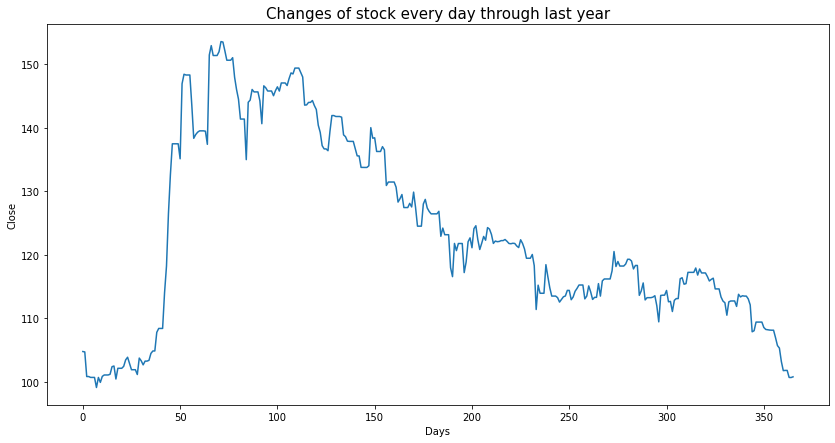

In [14]:
#Plotting close variations every day in one year
plt.figure(figsize=(14,7))
plt.plot(df_prices['Close'])
plt.ylabel('Close')
plt.xlabel('Days')
plt.title('Changes of stock every day through last year', fontsize=15)
plt.show()

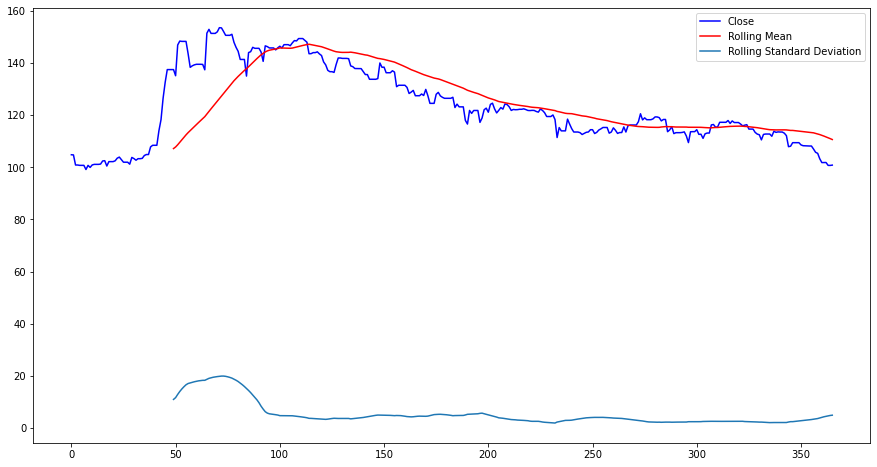

In [15]:
#Plotting moving average
close = df_prices['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(15, 8))
df_prices['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

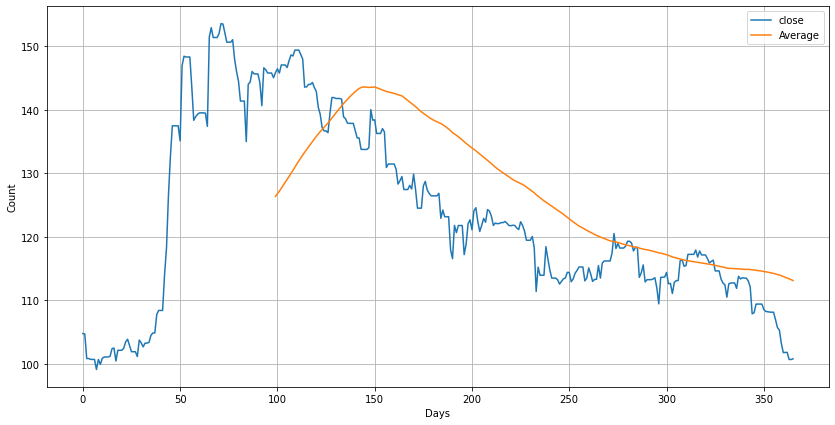

In [16]:
# examining rolling mean of stocks
avg = df_prices['Close'].rolling(window = 100).mean()

plt.figure(figsize=(14,7))
plt.plot(df_prices['Close'], label='close')
plt.plot(avg, label='Average')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Count')
plt.grid(True)

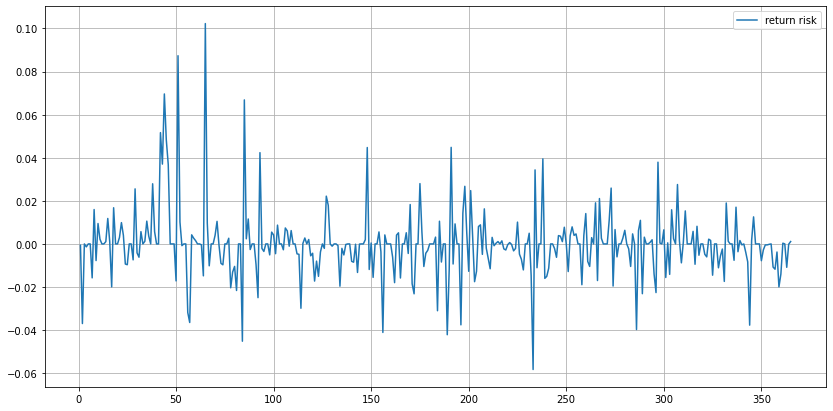

In [17]:
# examining return deviation to determine risk and return
ret = df_prices['Close'] / df_prices['Close'].shift(1) - 1

plt.figure(figsize=(14,7))
plt.plot(ret, label='return risk')
plt.legend()
plt.grid(True)

#### The graph shows a drop at the beginning and the end of the year while the  biggest jump was after 50 days

In [18]:
#Remove date column to represent only numerical data
df_prices.pop('Date')
df_prices.head()

,Open,High,Low,Close,Adj Close,Volume
0,104.804749,104.804749,104.804749,104.804749,104.804749,0
1,104.740677,104.740677,104.740677,104.740677,104.740677,0
2,100.871033,100.871033,100.871033,100.871033,100.871033,0
3,100.871033,100.871033,100.871033,100.871033,100.871033,0
4,100.733437,100.733437,100.733437,100.733437,100.733437,0


In [19]:
#Split data into features and labels 
X = df_prices.drop(df_prices['Volume'])
y = df_prices['Volume'].drop(0)

In [20]:
#Split Data into Training and testing values to fit machine learning models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### Fitting Machine Learning Models

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier

# Linear regression
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train, y_train)

# KNN Regression
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)

# Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
# Predicting scores for each model
regModel = reg.score(X_test, y_test)
knnModel = knn.score(X_test, y_test)
decisionModel = dtc.score(X_test, y_test)

print("The linear regression confidence is: ",regModel)
print("The knn regression confidence is: ",knnModel)
print("The Decision Tree regression confidence is: ",decisionModel)

The linear regression confidence is:  1.0
The knn regression confidence is:  1.0
The Decision Tree regression confidence is:  1.0


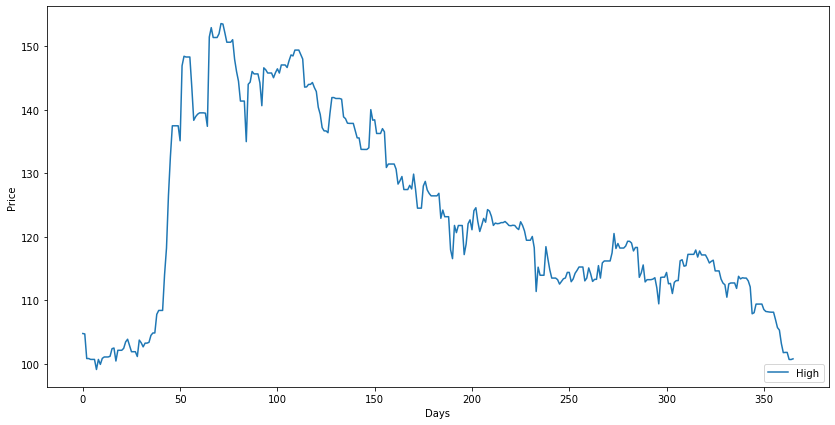

In [23]:
plt.figure(figsize=(14,7))
df_prices['High'].plot()
plt.legend(loc=4)
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()